# **Exploratory Data Analysis (EDA): Used Car details"**

# Problem Statement: Predicting Used Car Prices

The goal is to develop a machine learning model to predict the selling price of used cars based on various features such as manufacturing year, kilometers driven, fuel type, transmission type, seller type, and ownership details.

## Objectives:
1. Perform Exploratory Data Analysis (EDA) to understand key factors influencing used car prices.
2. Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
3. Build and evaluate machine learning models to predict the selling price of used cars accurately.
4. Derive actionable insights into market trends, such as:
   - How fuel type and transmission impact car prices.
   - The effect of car age and mileage on resale value.
5. Provide recommendations for car buyers and sellers to make data-driven decisions.

## Challenges:
- Handling potential missing or inconsistent data.
- Managing multicollinearity among features.
- Building a model that generalizes well across diverse car types and seller profiles.

This project aims to create a reliable prediction system while uncovering valuable insights into the used car market.


**Dataset Source = "https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho"**

# **1. Understanding the Dataset**


**IMPORTING DEPENDENCIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset Overview
The initial step involves understanding the structure and basic details of the dataset:

**IMPORTING THE DATASET**

In [2]:
file_path = 'data\car details.csv'
df = pd.read_csv(file_path)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\1158651908.py:1: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'data\car details.csv'


- **Number of Rows and Columns**: Determine the size of the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

- **First and Last 5 Rows**: Display the first and last few records to get an idea of the data structure and content.

In [4]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [5]:
df.tail()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0
2058,Mahindra,Bolero Power Plus ZLX [2016-2019],670000,2017,72000,Diesel,Manual,Guwahati,White,First,Individual,1493 cc,70 bhp @ 3600 rpm,195 Nm @ 1400 rpm,RWD,3995.0,1745.0,1880.0,7.0,NaN


- **Column Data Types and Missing Values**: Check the data types of each column and identify any missing values that need to be handled.

In [6]:
for i in df:
    print(i, '| type =',df[i].dtype) 

Make | type = object
Model | type = object
Price | type = int64
Year | type = int64
Kilometer | type = int64
Fuel Type | type = object
Transmission | type = object
Location | type = object
Color | type = object
Owner | type = object
Seller Type | type = object
Engine | type = object
Max Power | type = object
Max Torque | type = object
Drivetrain | type = object
Length | type = float64
Width | type = float64
Height | type = float64
Seating Capacity | type = float64
Fuel Tank Capacity | type = float64


In [7]:
print("Missing Values:")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values:
Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


### **DEALING WITH MISSING VALUES**

### Percentage of missing values

In [8]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 Make                  0.000000
Model                 0.000000
Price                 0.000000
Year                  0.000000
Kilometer             0.000000
Fuel Type             0.000000
Transmission          0.000000
Location              0.000000
Color                 0.000000
Owner                 0.000000
Seller Type           0.000000
Engine                3.885381
Max Power             3.885381
Max Torque            3.885381
Drivetrain            6.605148
Length                3.108305
Width                 3.108305
Height                3.108305
Seating Capacity      3.108305
Fuel Tank Capacity    5.488101
dtype: float64


- #### **Numerical Columns:**
    - Use mean, median, or mode to fill missing values.
    - For skewed data, the median is a better choice.

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

- #### **Categorical Columns:**
    - Replace missing values with the mode or a placeholder value like 'Unknown'.

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [11]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 Make                  0.0
Model                 0.0
Price                 0.0
Year                  0.0
Kilometer             0.0
Fuel Type             0.0
Transmission          0.0
Location              0.0
Color                 0.0
Owner                 0.0
Seller Type           0.0
Engine                0.0
Max Power             0.0
Max Torque            0.0
Drivetrain            0.0
Length                0.0
Width                 0.0
Height                0.0
Seating Capacity      0.0
Fuel Tank Capacity    0.0
dtype: float64


## Basic Statistics
Next, we compute basic statistics to understand the dataset better:

- **Summary Statistics for Numerical Columns**:
  - Key metrics such as mean, median, standard deviation, minimum, and maximum values for numerical columns (e.g.,Price,Year,Kilometer,Length,Width,Height,Seating Capacity	,Fuel Tank Capacity).

In [12]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4283.631374,1768.054395,1590.282661,5.296746,51.892326
std,2.419881e+06,3.363564,5.736172e+04,435.799127,133.146412,134.186875,0.811029,14.696588
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3986.000000,1695.000000,1485.000000,5.000000,42.000000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4620.000000,1831.000000,1672.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


- **Unique Value Counts for Categorical Columns**:
  - Count the unique values in each categorical column (e.g., Make, Model, Year) to understand the diversity in the data.

In [13]:
for i in df:
    print(df[i].name, '| Count unique values =',len(df[i].unique()))

Make | Count unique values = 33
Model | Count unique values = 1050
Price | Count unique values = 619
Year | Count unique values = 22
Kilometer | Count unique values = 847
Fuel Type | Count unique values = 9
Transmission | Count unique values = 2
Location | Count unique values = 77
Color | Count unique values = 17
Owner | Count unique values = 6
Seller Type | Count unique values = 3
Engine | Count unique values = 108
Max Power | Count unique values = 335
Max Torque | Count unique values = 290
Drivetrain | Count unique values = 3
Length | Count unique values = 248
Width | Count unique values = 170
Height | Count unique values = 196
Seating Capacity | Count unique values = 6
Fuel Tank Capacity | Count unique values = 55


## Univariate Analysis


**Numerical Features**

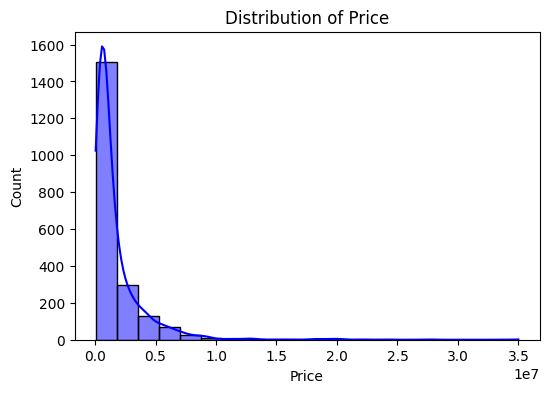

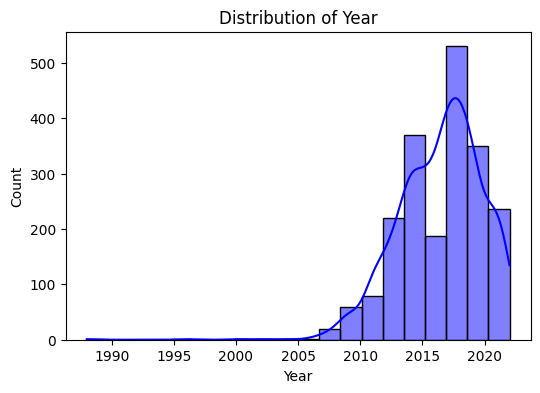

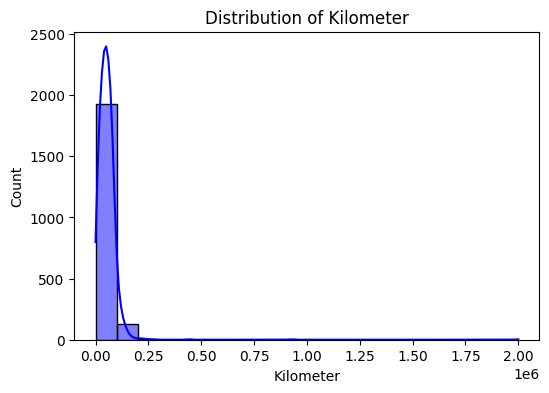

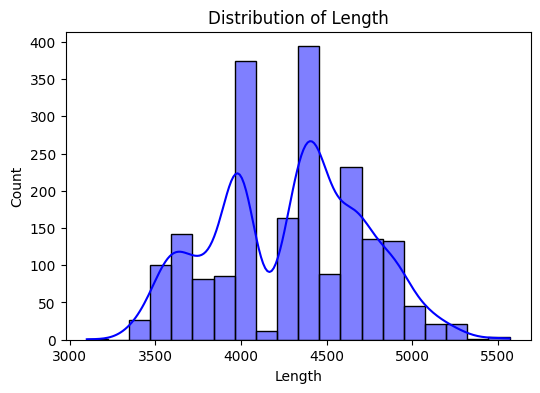

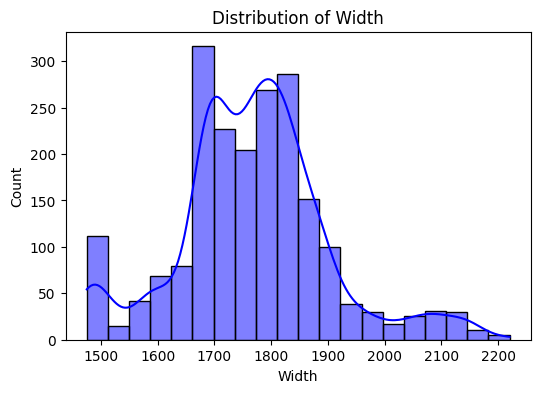

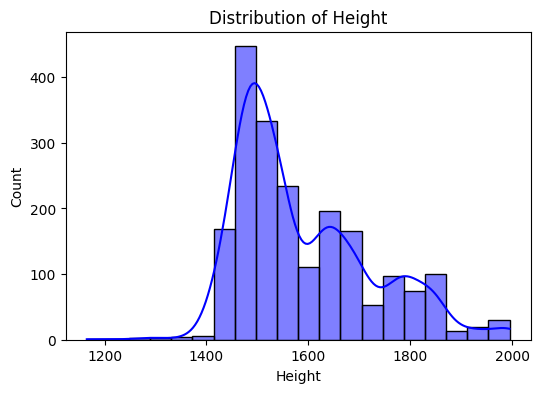

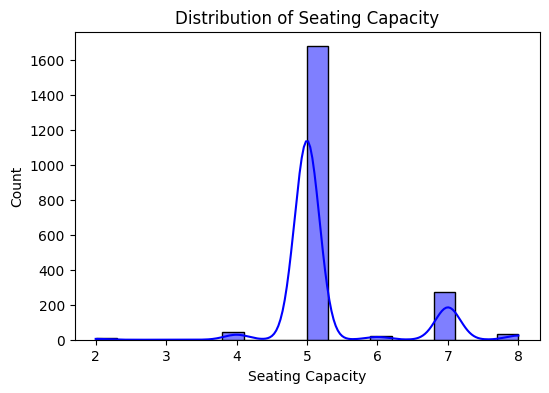

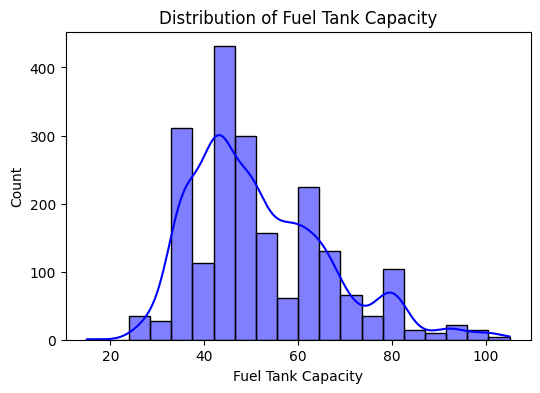

In [14]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes != 'O']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

**Categorical Features**

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


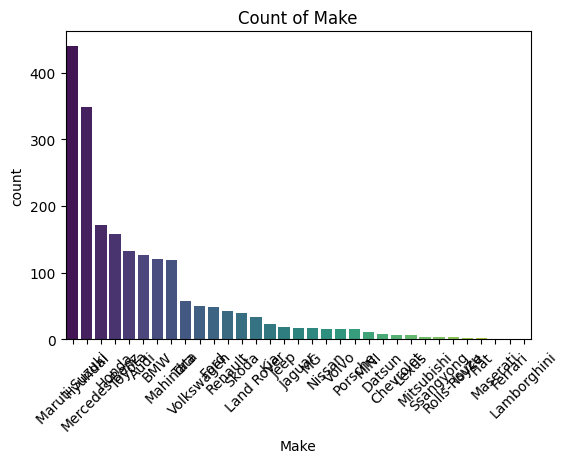

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


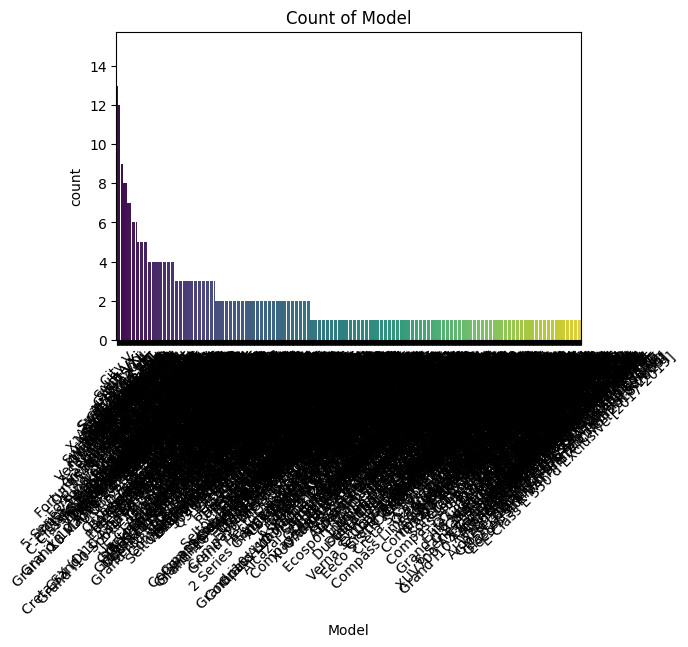

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


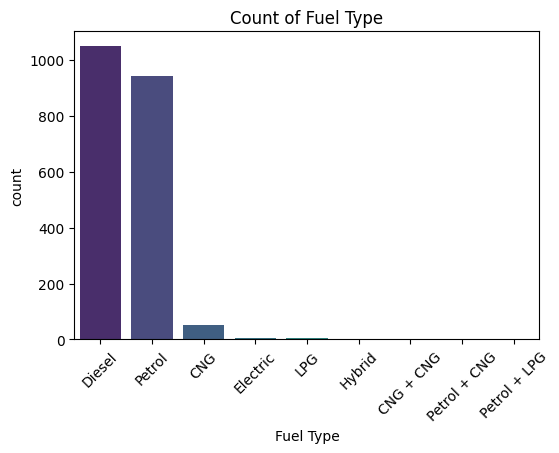

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


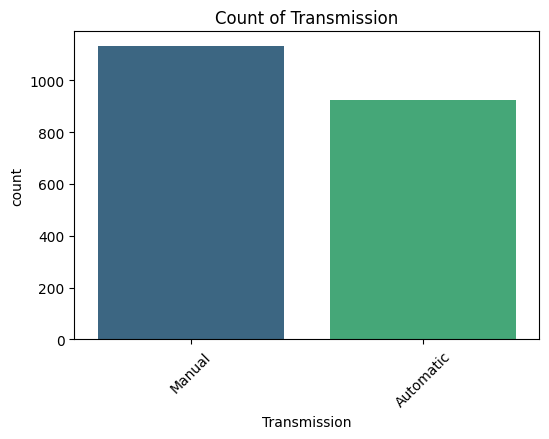

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


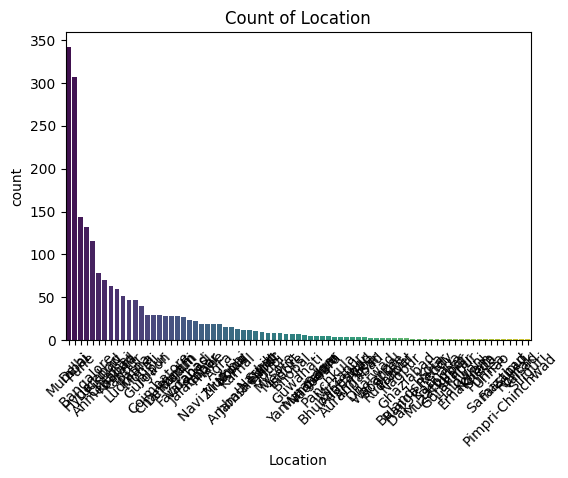

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


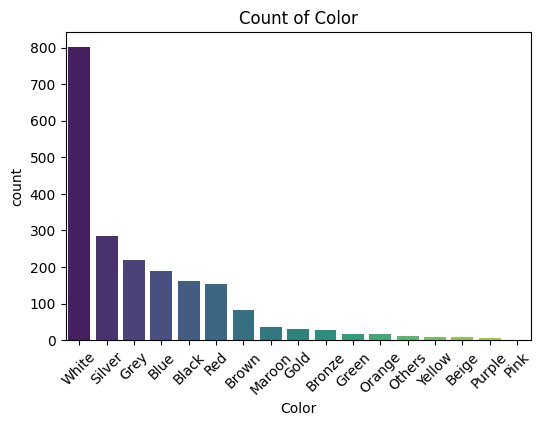

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


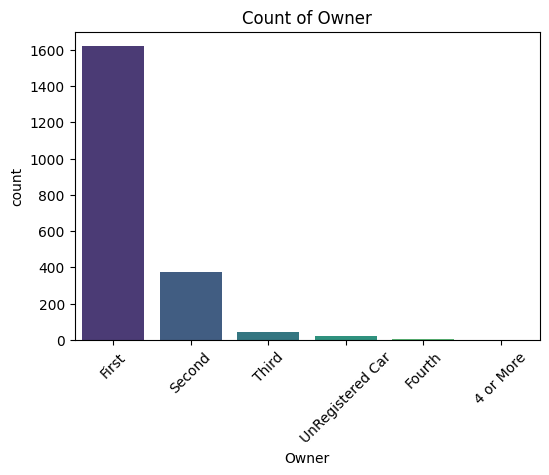

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


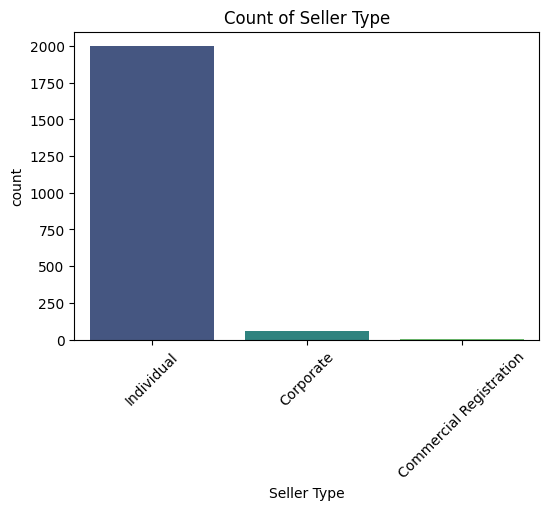

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


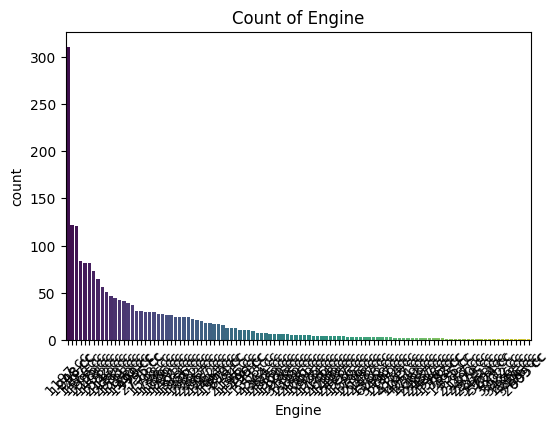

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


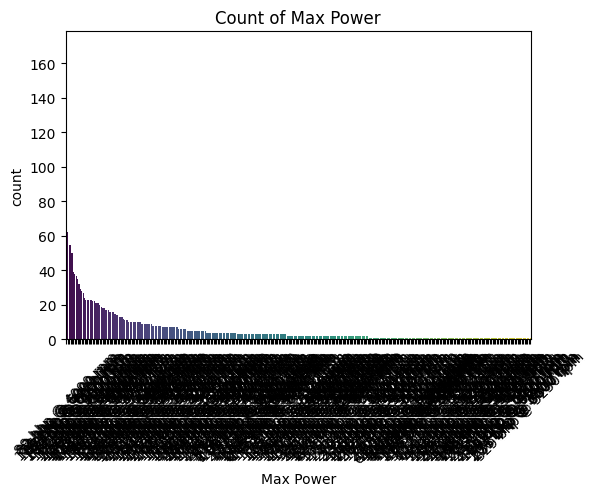

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


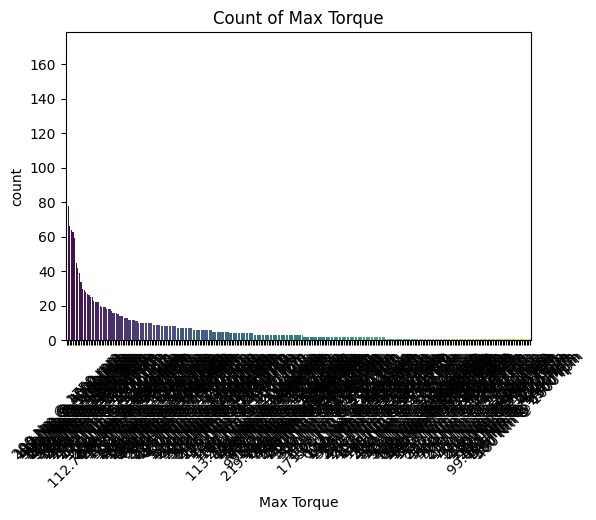

C:\Users\kevin\AppData\Local\Temp\ipykernel_18132\2821171041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)


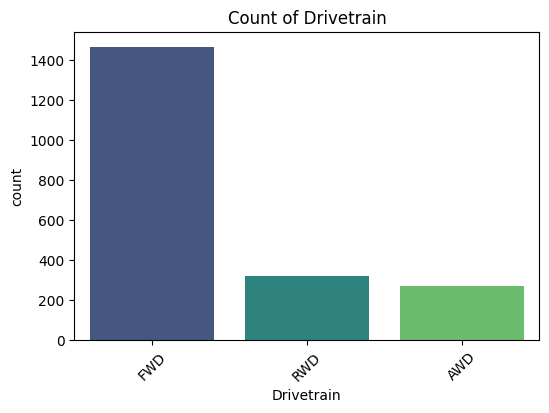

In [15]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x = col, legend=False,data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

## **GRAPHS WITH SATISFACTION RATING AND EACH FEATURE**

## **Insights & Observations**

In [16]:
## **Insights & Observations**
popular_color = df['Color'].value_counts().head(10)
popular_color


Color
White     802
Silver    285
Grey      220
Blue      190
Black     163
Red       154
Brown      82
Maroon     37
Gold       30
Bronze     28
Name: count, dtype: int64

In [17]:
best_sellers = df.groupby('Make')['Price'].mean().sort_values(ascending=False).head(10)
best_sellers

Make
Ferrari          3.500000e+07
Lamborghini      2.400000e+07
Rolls-Royce      1.933333e+07
Maserati         9.000000e+06
Porsche          8.342667e+06
Land Rover       6.699333e+06
Mercedes-Benz    4.384860e+06
Lexus            4.125000e+06
BMW              3.768967e+06
Jaguar           3.564647e+06
Name: Price, dtype: float64